Let's load up the data and do a little preprocessing. We already checked the adjusted close prices, and they always match the closing prices, so we can drop them. We're also doing a little feature engineering, adding the year and the daily dollars.

In [1]:
import pandas as pd

DATA = '/kaggle/input/netflix-stock-price/NFLX.csv'

df = pd.read_csv(filepath_or_buffer=DATA, parse_dates=['Date']).drop(columns=['Adj Close'])
df['year'] = df['Date'].dt.year
df['dollars'] = 0.5 * df['Volume'] * (df['High'] + df['Low'])
df.head()

,Date,Open,High,Low,Close,Volume,year,dollars
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,104790000,2002,1.251492e+08
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,11104800,2002,1.344871e+07
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,6609400,2002,7.895873e+06
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,6757800,2002,7.602525e+06
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,10154200,2002,1.106445e+07


Let's take a look at the price correlations.

In [2]:
df[['Open', 'High', 'Low', 'Close', ]].corr()

,Open,High,Low,Close
Open,1.000000,0.999849,0.999851,0.999676
High,0.999849,1.000000,0.999809,0.999856
Low,0.999851,0.999809,1.000000,0.999847
Close,0.999676,0.999856,0.999847,1.000000


The daily price correlations will always be close to 1.0 unless we have a really short time series with a lot of daily movement in one direction, but if a cross-price correlation is exactly 1.0 we know we have duplicate data.

Let's look at the closing price time series. Because the price range is so large we're going to use a log plot in the price direction.

<Axes: xlabel='Date', ylabel='Close'>

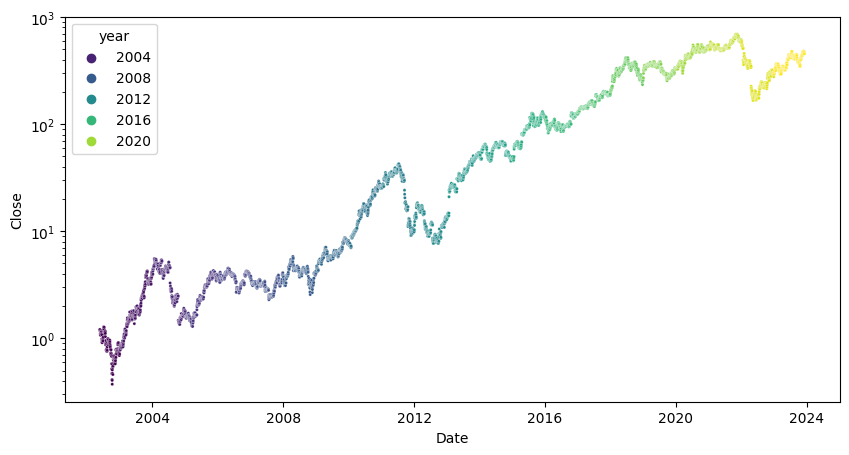

In [3]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Date', y='Close', hue='year', palette='viridis', s=5)

It's funny/painful how if you bought this stock and just held it you would make a very nice profit, but there would be multiple reversals that cut your holding in half.

Let's look at the price as a function of the volume. We expect that broadly volume will decline as prices rise, but other than that we probably expect prices and volume to be uncorrelated over time.

In [4]:
df[['Close', 'Volume']].corr()

,Close,Volume
Close,1.00000,-0.28377
Volume,-0.28377,1.00000


<Axes: xlabel='Volume', ylabel='Close'>

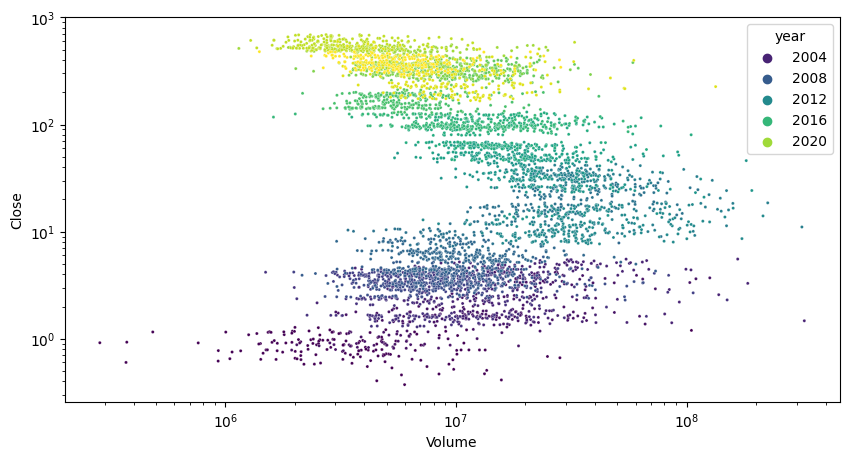

In [5]:
plt.figure(figsize=(10, 5))
plt.xscale(value='log')
plt.yscale(value='log')
scatterplot(data=df, x='Volume', y='Close', hue='year', palette='viridis', s=5)

What do we see? We see broad appreciation in price over time, but broadly there's no clear trend, as we might have expected from the correlations above.

Let's take a look at the daily dollars traded over time, which we have approximated by multiplying the daily mean price by the daily volume.

<Axes: xlabel='Date', ylabel='dollars'>

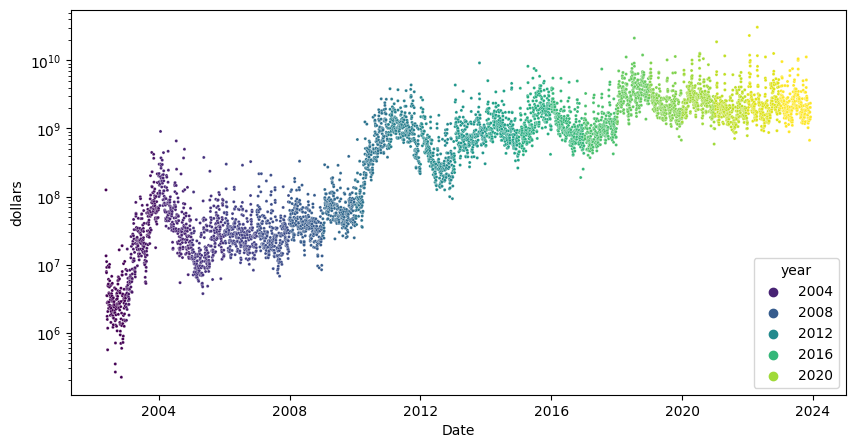

In [6]:
plt.figure(figsize=(10, 5))
# plt.xscale(value='log')
plt.yscale(value='log')
scatterplot(data=df, x='Date', y='dollars', hue='year', palette='viridis', s=5)

On a log plot we see that very broadly the dollars traded each day have trended up, even or especially during periods of time when the price was in a reversal.

Would buying this stock at its minimum and selling at its maximum give a good return?

In [7]:
df['Close'].max() / df['Close'].min()

1855.1079958268185

Yes a return of more than 1800x would be great, even annualized over 22 years.